In [26]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [68]:
apple = cv2.imread(os.path.join('images','apple.jpg'))
orange = cv2.imread(os.path.join('images', 'orange.jfif'))
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)

apple = cv2.resize(apple, (475, 475))
orange = cv2.resize(orange, (475, 475))

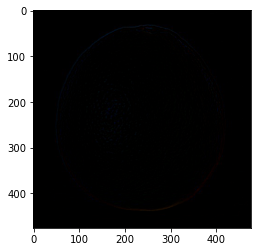

In [78]:
res = np.hstack([apple[:, :255], orange[:, 255:]])

apple_copy = apple.copy()
gp_apple = [apple_copy]

for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)

orange_copy = orange.copy()
gp_orange = [orange_copy]

for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)
    
    
apple_copy = gp_apple[5]
lp_apple = [apple_copy]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gp_apple[i])
    base_gp_apple = gp_apple[i-1]
    if i == 3:
        base_gp_apple = cv2.resize(base_gp_apple, (120, 120))
    elif i == 1:
        base_gp_apple = cv2.resize(base_gp_apple, (476, 476))
    laplacian = cv2.subtract(base_gp_apple, gaussian_extended)
    plt.imshow(laplacian)
    lp_apple.append(laplacian)
    
orange_copy = gp_orange[5]
lp_orange = [orange_copy]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gp_orange[i])
    base_gp_orange = gp_orange[i-1]
    if i == 3:
        base_gp_orange = cv2.resize(base_gp_orange, (120, 120))
    elif i == 1:
        base_gp_orange = cv2.resize(base_gp_orange, (476, 476))
    laplacian = cv2.subtract(base_gp_orange, gaussian_extended)
    plt.imshow(laplacian)
    lp_orange.append(laplacian)


apple_orange = []

for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    pass